<a href="https://colab.research.google.com/github/VandhanaV/Sparks-internship/blob/master/Task2_Lin_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORTING LIBRARIES

import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#LOAD DATA

path = "https://raw.githubusercontent.com/VandhanaV/Sparks-internship/master/task2_student_scores.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#GETTING STATISTICAL DATA FOR FEATURE AND TARGET

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Observation - Since median is less than mean data is right skewed


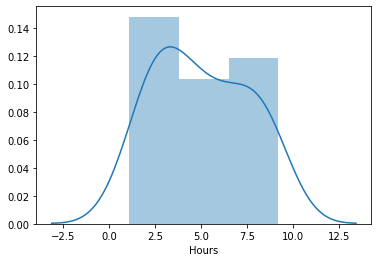

In [5]:
#PLOT DISTRIBUTION OF HOURS AND SCORES

sns.distplot(df['Hours'])

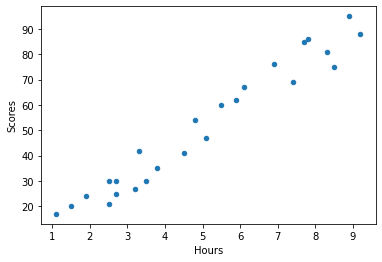

In [6]:
#PLOTING THE RELATION BETWEEN HOURS AND SCORES

df.plot(kind = 'scatter', x = 'Hours', y = 'Scores')


Observation - It is visible there exist linear relation between hours and scores

In [7]:
X_train,X_test,y_train,y_test = train_test_split(df[['Hours']],df['Scores'], random_state = 0, test_size = 0.2)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_train)

Coefficients: 
 [9.91065648]
Intercept: 
 2.018160041434662
Mean squared error: 2863.23
Coefficient of determination: -462.43


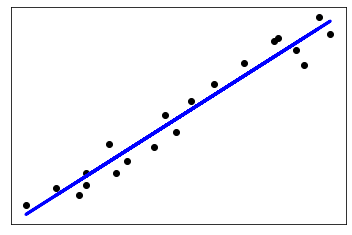

In [8]:
# The coefficients
print('Coefficients: \n', linreg.coef_)
print('Intercept: \n', linreg.intercept_)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(X_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(X_train, y_pred))

# Plot outputs
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [9]:
print("Accuracy of the model: %.2f"%linreg.score(X_test, y_test))

Accuracy of the model: 0.95


**What
will be predicted score if a student study for 9.25 hrs in a
day?**

In [10]:
test_hr = 9.25
test_score = float(linreg.predict([[9.25]]))
print("Score of student studying for 9.25 hrs is %.2f"%test_score)

Score of student studying for 9.25 hrs is 93.69
